In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '${:,.2f}'.format

In [2]:
df = pd.read_csv('data/Past Trades.csv')
df = df.iloc[:,:15]
df = df.loc[df.Exc != 'Hiatus']
df = df.loc[~pd.isna(df['Buy date'])].reset_index(drop=True)
currency_cols = [i for i in df.columns if 'price' in i.lower() or 'profit' in i.lower() or 'amount' in i.lower()]
df['Buy date'] = pd.to_datetime(df['Buy date'], format='%d %b %y')
df['Sell date'] = pd.to_datetime(df['Sell date'], format='%d %b %y')
df['Buy date'] = pd.to_datetime(df['Buy date'], format='%d %b %y')
df['Sell date'] = pd.to_datetime(df['Sell date'], format='%d %b %y')
df[currency_cols] = df[currency_cols].replace('[$,]', '', regex=True).astype(float)

In [3]:
df

,Exc,Code,Units,Buy price,Buy date,Buy amount,True buy amount,Sell price,Sell amount,True sell amount,Sell date,Profit,True Profit,Days,Actual\n%
0,NaN,GSK,$106.00,$36.86,2018-01-09,"$3,906.63","$3,916.05",$39.72,"$4,210.32","$4,200.78",2018-04-05,$303.69,$284.73,$86.00,7.29%
1,NaN,SBUX,$100.00,$57.45,2018-01-30,"$5,745.00","$5,754.42",$60.09,"$6,009.00","$5,999.42",2018-04-12,$264.00,$245.00,$72.00,4.26%
2,NaN,AMZN,$3.00,"$1,572.00",2018-03-20,"$4,716.00","$4,725.42","$1,590.00","$4,770.00","$4,765.17",2018-04-27,$54.00,$39.75,$38.00,0.84%
3,NaN,AMZN,$3.00,"$1,443.53",2018-04-05,"$4,330.59","$4,340.01","$1,590.00","$4,770.00","$4,765.17",2018-04-27,$439.41,$425.16,$22.00,9.82%
4,NaN,SBUX,$150.00,$57.92,2018-04-30,"$8,688.00","$8,697.42",$59.00,"$8,850.00","$8,840.44",2018-10-25,$162.00,$143.02,$178.00,1.65%
5,NaN,AMZN,$4.00,"$1,540.00",2018-11-19,"$6,160.00","$6,169.42","$1,725.00","$6,900.00","$6,893.62",2019-01-31,$740.00,$724.20,$73.00,11.76%
6,NaN,NFLX,$16.00,$264.00,2018-12-10,"$4,224.00","$4,233.42",$318.00,"$5,088.00","$5,078.50",2019-01-10,$864.00,$845.08,$31.00,20.01%
7,NaN,AMZN,$2.00,"$1,627.98",2018-12-14,"$3,255.96","$3,265.40","$1,725.00","$3,450.00","$3,446.81",2019-01-31,$194.04,$181.41,$48.00,5.57%
8,NaN,AAPL,$30.00,$169.40,2019-02-04,"$5,082.00","$5,091.42",$193.40,"$5,802.00","$5,792.49",2019-03-21,$720.00,$701.07,$45.00,13.80%
9,NaN,SPOT,$28.00,$139.33,2019-02-04,"$3,901.24","$3,911.21",$153.50,"$4,298.00","$4,288.48",2019-06-20,$396.76,$377.27,$136.00,9.67%


In [4]:
(df.loc[:76,'Buy date']>df.loc[:76,'Sell date']).any()

False

In [5]:
buy_df = df.copy().drop(columns=['Sell date']).rename(columns={'Buy date': 'Date'})
sell_df = df.copy().drop(columns=['Buy date']).rename(columns={'Sell date': 'Date'}).sort_values(by='Date').dropna(subset=['Date'])
buy_df['Action'] = 1
sell_df['Action'] = -1
combined_df = pd.concat([buy_df,sell_df]).sort_values(by='Date').reset_index(drop=True)

In [6]:
combined_df#.iloc[np.r_[:4,-4:0]]

,Exc,Code,Units,Buy price,Date,Buy amount,True buy amount,Sell price,Sell amount,True sell amount,Profit,True Profit,Days,Actual\n%,Action
0,NaN,GSK,$106.00,$36.86,2018-01-09,"$3,906.63","$3,916.05",$39.72,"$4,210.32","$4,200.78",$303.69,$284.73,$86.00,7.29%,1
1,NaN,SBUX,$100.00,$57.45,2018-01-30,"$5,745.00","$5,754.42",$60.09,"$6,009.00","$5,999.42",$264.00,$245.00,$72.00,4.26%,1
2,NaN,AMZN,$3.00,"$1,572.00",2018-03-20,"$4,716.00","$4,725.42","$1,590.00","$4,770.00","$4,765.17",$54.00,$39.75,$38.00,0.84%,1
3,NaN,AMZN,$3.00,"$1,443.53",2018-04-05,"$4,330.59","$4,340.01","$1,590.00","$4,770.00","$4,765.17",$439.41,$425.16,$22.00,9.82%,1
4,NaN,GSK,$106.00,$36.86,2018-04-05,"$3,906.63","$3,916.05",$39.72,"$4,210.32","$4,200.78",$303.69,$284.73,$86.00,7.29%,-1
5,NaN,SBUX,$100.00,$57.45,2018-04-12,"$5,745.00","$5,754.42",$60.09,"$6,009.00","$5,999.42",$264.00,$245.00,$72.00,4.26%,-1
6,NaN,AMZN,$3.00,"$1,443.53",2018-04-27,"$4,330.59","$4,340.01","$1,590.00","$4,770.00","$4,765.17",$439.41,$425.16,$22.00,9.82%,-1
7,NaN,AMZN,$3.00,"$1,572.00",2018-04-27,"$4,716.00","$4,725.42","$1,590.00","$4,770.00","$4,765.17",$54.00,$39.75,$38.00,0.84%,-1
8,NaN,SBUX,$150.00,$57.92,2018-04-30,"$8,688.00","$8,697.42",$59.00,"$8,850.00","$8,840.44",$162.00,$143.02,$178.00,1.65%,1
9,NaN,SBUX,$150.00,$57.92,2018-10-25,"$8,688.00","$8,697.42",$59.00,"$8,850.00","$8,840.44",$162.00,$143.02,$178.00,1.65%,-1


In [7]:
net_value_invested, net_value_dates = [], []
for index, row in combined_df.iterrows():
    if index == 0:
        net_value_invested.append(row['Buy amount'])
        net_value_dates.append(row['Date'])
    elif row['Date'] == net_value_dates[-1]:
        net_value_invested[-1] = net_value_invested[-1] + row['Buy amount']*row['Action']
    else:
        net_value_invested.append(net_value_invested[-1] + row['Buy amount']*row['Action'])
        net_value_dates.append(row['Date'])

net_profit, net_profit_dates = [], []
for index, row in sell_df.iterrows():
    if index == 0:
        net_profit.append(row['True Profit'])
        net_profit_dates.append(row['Date'])
    elif row['Date'] == net_profit_dates[-1]:
        net_profit[-1] = net_profit[-1] + row['True Profit']
    else:
        net_profit.append(net_profit[-1] + row['True Profit'])
        net_profit_dates.append(row['Date'])

In [8]:
pd.DataFrame(pd.Series(data=net_value_invested, index=net_value_dates, name='Net value'))
# pd.DataFrame(pd.Series(data=net_profit, index=net_profit_dates, name='Net value'))

,Net value
2018-01-09,"$3,906.63"
2018-01-30,"$9,651.63"
2018-03-20,"$14,367.63"
2018-04-05,"$14,791.59"
2018-04-12,"$9,046.59"
2018-04-27,$0.00
2018-04-30,"$8,688.00"
2018-10-25,$0.00
2018-11-19,"$6,160.00"
2018-12-10,"$10,384.00"


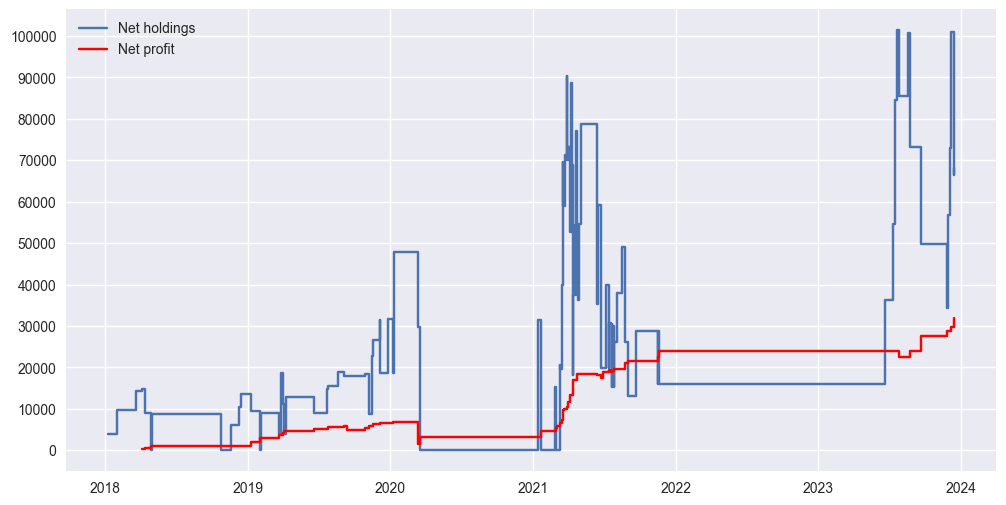

In [10]:
plt.figure(figsize=(12,6))
plt.style.use('seaborn-v0_8')
plt.step(net_value_dates, net_value_invested, label='Net holdings', where='post')
plt.step(net_profit_dates, net_profit, label='Net profit', where='post', color='red')
plt.yticks(range(0,100100,10000))
plt.legend()
plt.grid(True)
plt.show()